In [ ]:
exec(open('init_notebook.py').read())
import dill
from highD.PlotHelper import Histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataDir = "C:/Users/abjaw/Documents/GitHub/drone-dataset-tools/data/highD_dataset"
dillDir = "C:/Users/abjaw/Documents/GitHub/drone-dataset-tools/output/dill"
outputDir = "C:/Users/abjaw/Documents/GitHub/drone-dataset-tools/output"

In [ ]:
dill_highD_list = []
for i in range(1, 50):
    filename = dillDir + '/highD_' + str(i)+'_.dill'
    ifile = open(filename, "rb")
    dill_highD_list.append(dill.load(ifile))
    ifile.close()


In [25]:
def plotMetricsDF(data, col, xlabel="", bins=10, kde=True):
        g = sns.displot(data=data, x=col, kde=kde, bins=bins)
        g.fig.set_size_inches(10,4)
        if xlabel != "":
            g.set_axis_labels(xlabel, "Count")

        g.set_titles(f"Distribution of {xlabel}")
        plt.axvline(x=data[col].mean(), color='red')
        plt.show()

## Distribution Velocity 

Minimum Velocity

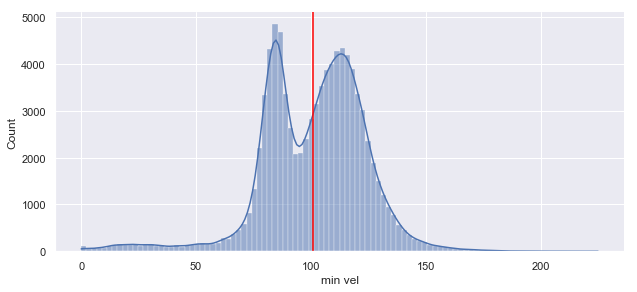

In [26]:
df = pd.DataFrame(columns=['minXVelocity'])
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    df = df.append(trackMeta[['minXVelocity']] * 3.60)
plotMetricsDF(df, 'minXVelocity', xlabel='min vel', bins=100, kde=True)

Maximum Velocity

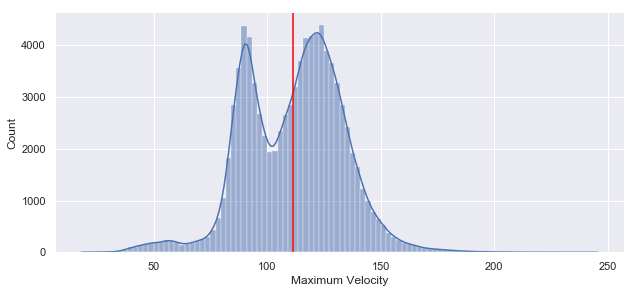

In [29]:
df = pd.DataFrame(columns=['maxXVelocity'])
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    df = df.append(trackMeta[['maxXVelocity']] * 3.60)
plotMetricsDF(df, 'maxXVelocity', xlabel='Maximum Velocity', bins=100, kde=True)

Average Velocity

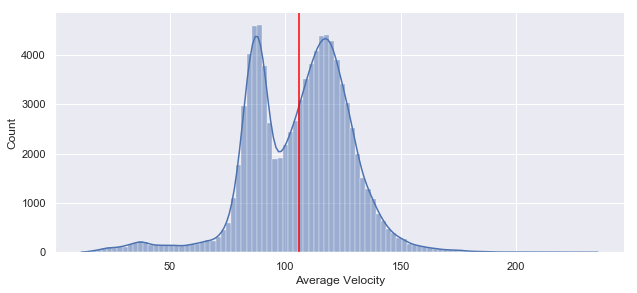

In [30]:
df = pd.DataFrame(columns=['meanXVelocity'])
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    df = df.append(trackMeta[['meanXVelocity']] * 3.60)
plotMetricsDF(df, 'meanXVelocity', xlabel='Average Velocity', bins=100, kde=True)

## Headway Distribution

Minimum Distance Headway


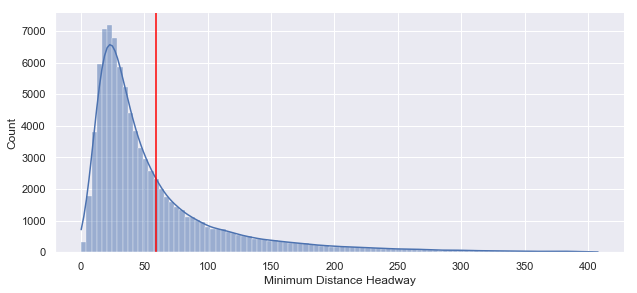

In [32]:
df = pd.DataFrame(columns=['minDHW'])
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    trackMeta = trackMeta[trackMeta['minDHW'] > 0]
    df = df.append(trackMeta[['minDHW']])
plotMetricsDF(df, 'minDHW', xlabel='Minimum Distance Headway', bins=100, kde=True)

Minimum Time Headway

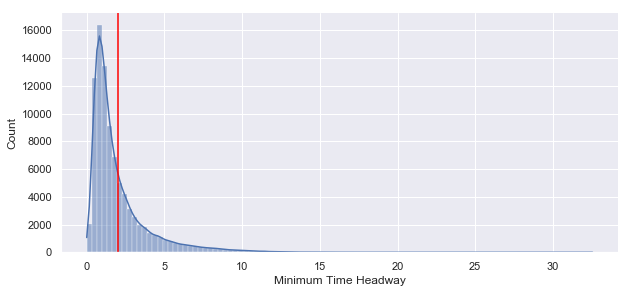

In [33]:
df = pd.DataFrame(columns=['minTHW'])
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    trackMeta = trackMeta[trackMeta['minTHW'] > 0]
    df = df.append(trackMeta[['minTHW']])
plotMetricsDF(df, 'minTHW', xlabel='Minimum Time Headway', bins=100, kde=True)

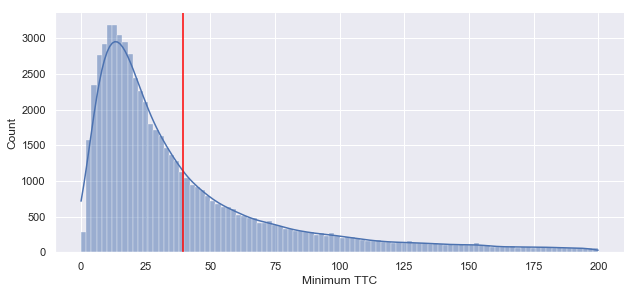

In [36]:
df = pd.DataFrame(columns=['minTTC'])
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    trackMeta = trackMeta[trackMeta['minTTC'] > 0]
    trackMeta = trackMeta[trackMeta['minTTC'] < 200]
    df = df.append(trackMeta[['minTTC']])
plotMetricsDF(df, 'minTTC', xlabel='Minimum TTC', bins=100, kde=True)

## Acceleration Distribution

In [37]:
df = pd.DataFrame(columns=['xVelocity'])
for highD in dill_highD_list:
    tracks = highD.tracks 
    print(tracks.shape)
#     trackMeta = trackMeta[trackMeta['minTTC'] > 0]
#     trackMeta = trackMeta[trackMeta['minTTC'] < 200]
#     df = df.append(trackMeta[['minTTC']])
# plotMetricsDF(df, 'minTTC', xlabel='Minimum TTC', bins=100, kde=True)

(378115, 25)
(303488, 25)
(390687, 25)
(402538, 25)
(455823, 25)
(257031, 25)
(482252, 25)
(436634, 25)
(258312, 25)
(658771, 25)
(1132881, 25)
(1044990, 25)
(981609, 25)
(311143, 25)
(338052, 25)
(323650, 25)
(190895, 25)
(328294, 25)
(405639, 25)
(353430, 25)
(236204, 25)
(467065, 25)
(441012, 25)
(2019752, 25)
(1586031, 25)
(952640, 25)
(818651, 25)
(756828, 25)
(883030, 25)
(808891, 25)
(490536, 25)
(802434, 25)
(636161, 25)
(691465, 25)
(952136, 25)
(692115, 25)
(831446, 25)
(727555, 25)
(796159, 25)
(778660, 25)
(822853, 25)
(755628, 25)
(851925, 25)
(815693, 25)
(1090968, 25)
(855185, 25)
(870004, 25)
(708397, 25)
(755741, 25)
